## 1. Word Embeddings

A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning.

It is defining a word by the company that it keeps that allows the word embedding to learn something about the meaning of words. The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to breakthrough performance with deep neural networks on problems like machine translation.

In this tutorial, we are going to look at how to use two different word embedding methods called word2vec by researchers at Google and GloVe by researchers at Stanford.

## 2. Genism Python Library

Gensim is an open source Python library for natural language processing, with a focus on topic modeling.

Most notably for this tutorial, it supports an implementation of the Word2Vec word embedding for learning new word vectors from text.

It also provides tools for loading pre-trained word embeddings in a few formats and for making use and querying a loaded embedding.

We will use the Gensim library in this tutorial.

In [1]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


## 3. Develop Word2Vec Embedding

In [2]:
import numpy as np
import pandas as pd

from gensim.models import Word2Vec
import nltk
nltk.download('punkt') #for sent_tokenize()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Word2vec is one algorithm for learning a word embedding from a text corpus.

There are two main training algorithms that can be used to learn the embedding from text; they are continuous bag of words (CBOW) and skip grams.

Gensim provides the Word2Vec class for working with a Word2Vec model.

Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new Word2Vec() instance.

In [3]:
#Training data
sentences = "It is an hour after school, and Clay Jensen comes home to find a package addressed to him propped against his family’s front door. Excited, he opens the package and finds seven audiotapes numbered from 1 to 13 with dark blue nail polish. The tapes throw Clay for a loop because no one listens to cassettes anymore. For a moment, he thinks he has no way to play them, but then remembers his dad has a tape-playing stereo in the garage. Clay takes the tapes into the garage, puts Cassette 1 into the stereo, and hits play."

In [4]:
sent_token = nltk.sent_tokenize(sentences)

In [5]:
sentence = []
for sent in sent_token:
  sentence.append(sent.split())


In [6]:
#train model
model = Word2Vec(sentence, min_count=1) #sg = 0 for CBOW (default), else sg = 1 for Skip - Gram model

There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:
<ul>
<li>size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).</li>
<li>window: (default 5) The maximum distance between a target word and words around the target word.</li>
<li>min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.</li>
<li>workers: (default 3) The number of threads to use while training.</li>
<li>sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).</li>
</ul>

After the model is trained, it is accessible via the “wv” attribute. This is the actual word vector model in which queries can be made.

In [7]:
#Summarize the loaded model
print(model)

Word2Vec(vocab=73, size=100, alpha=0.025)


In [8]:
#Summarize the vocabulary
words = list(model.wv.vocab)
print(words)

['It', 'is', 'an', 'hour', 'after', 'school,', 'and', 'Clay', 'Jensen', 'comes', 'home', 'to', 'find', 'a', 'package', 'addressed', 'him', 'propped', 'against', 'his', 'family’s', 'front', 'door.', 'Excited,', 'he', 'opens', 'the', 'finds', 'seven', 'audiotapes', 'numbered', 'from', '1', '13', 'with', 'dark', 'blue', 'nail', 'polish.', 'The', 'tapes', 'throw', 'for', 'loop', 'because', 'no', 'one', 'listens', 'cassettes', 'anymore.', 'For', 'moment,', 'thinks', 'has', 'way', 'play', 'them,', 'but', 'then', 'remembers', 'dad', 'tape-playing', 'stereo', 'in', 'garage.', 'takes', 'into', 'garage,', 'puts', 'Cassette', 'stereo,', 'hits', 'play.']


In [9]:
#Review a word "tapes"
print(model['It'])

[ 1.3052676e-03 -4.2580487e-03  2.5320530e-04 -3.3608919e-03
 -9.8404044e-04 -2.3244179e-03 -4.8848097e-03  5.1090901e-04
 -3.1224391e-03  2.6518288e-03  2.5945043e-03  1.9427509e-03
  3.6432461e-03 -4.4690142e-03 -3.6543286e-03 -6.1293744e-05
 -3.7349267e-03 -3.8511504e-03 -1.5952610e-03 -1.4219814e-03
 -1.9633567e-03  3.1533639e-03  4.8595867e-03 -1.7522743e-03
 -2.3500989e-03  3.0296745e-03  2.4028672e-03  3.2776876e-03
  4.9238103e-03 -2.6221185e-03 -2.3745771e-03 -1.4933547e-03
 -2.2445736e-03 -4.9945004e-03 -1.2078491e-03 -3.1261439e-03
  4.9950401e-03  4.1099670e-03  2.7966197e-03 -4.8170807e-03
 -2.3802023e-03 -1.2422501e-03  2.0723057e-03 -6.3563371e-04
 -3.9606406e-03  1.5469508e-03  1.8172694e-04  3.7834323e-03
  1.4023142e-03  4.5087789e-03  1.4520473e-03  1.0293656e-03
 -4.9136272e-03  2.8374912e-03  3.5642211e-03 -2.2738150e-03
 -4.8427572e-03 -4.8171761e-03  3.2513405e-03 -3.9503407e-03
 -2.0866571e-03 -6.0939806e-04 -1.7012502e-03  1.8636939e-03
 -2.0852373e-03 -4.09625

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Finally, a trained model can then be saved to file by calling the save_word2vec_format() function on the word vector model.

In [10]:
#Save the model
model.wv.save_word2vec_format('yesterday_model.bin')

## 4. Visualize Word embedding

In [11]:
#Retrieve all the words
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


You can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.

#### 4.1 Plot vectors using PCA

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class as follows.

In [13]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

The resulting projection can be plotted using matplotlib as follows, pulling out the two dimensions as x and y coordinates.

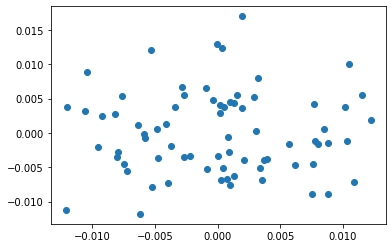

In [14]:
plt.scatter(result[:, 0], result[:, 1])

We can go one step further and annotate the points on the graph with the words themselves. A crude version without any nice offsets looks as follows.

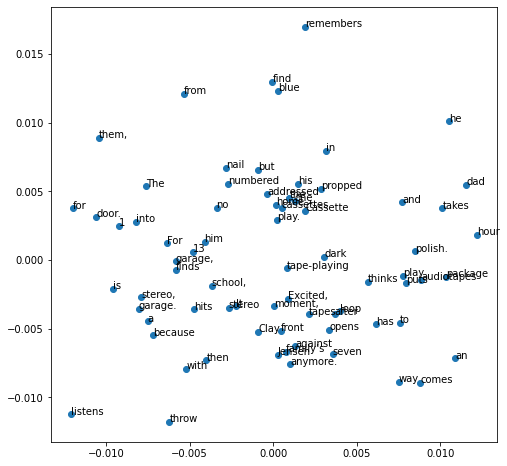

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()